##6.2 Data cleaning and preparation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data ='https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv'
!wget $data -O 'dataset-week-6.csv'

--2023-10-22 10:57:24--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘dataset-week-6.csv’

dataset-week-6.csv  100%[===================>] 178.21K  --.-KB/s    in 0.02s   

2023-10-22 10:57:24 (8.20 MB/s) - ‘dataset-week-6.csv’ saved [182489/182489]



In [3]:
df = pd.read_csv('dataset-week-6.csv' )

In [13]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
status_values = {
    1:'ok',
    2:'default',
    0:'unk'
}
df.status =df.status.map(status_values)
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [6]:
df.describe().round()


,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [17]:
df.income.max()

99999999

In [7]:
for c in ['income','assets','debt']:
  df[c]= df[c].replace(to_replace=99999999, value=np.nan)

In [19]:
df.describe().round()


,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [8]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=11)
df_train, df_val = train_test_split(df_full_train,test_size=0.25, random_state=11)

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test= df_val.reset_index(drop=True)

In [12]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [13]:
del df_train['status']
del df_val['status']
del df_test['status']

In [28]:
df_train.columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

##6.3 Decision Trees

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [15]:
train_dicts= df_train.fillna(0).to_dict(orient='records')

In [16]:
dv= DictVectorizer(sparse=False)

In [17]:
X_train =dv.fit_transform(train_dicts)

In [18]:
val_dicts= df_val.fillna(0).to_dict(orient='records')

In [19]:
X_val =dv.transform(val_dicts)

In [20]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [21]:
dt= DecisionTreeClassifier()

In [22]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [24]:
roc_auc_score(y_val,y_pred)

0.6521427187522705

In [25]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train,y_pred)

1.0

In [26]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

In [27]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7054989859726213
val: 0.6685264343319367


In [28]:
from sklearn.tree import export_text

In [29]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))


|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



In [30]:
dt.predict_proba(X_val)

array([[0.83013145, 0.16986855],
       [0.83013145, 0.16986855],
       [0.61928934, 0.38071066],
       ...,
       [0.29739777, 0.70260223],
       [0.29739777, 0.70260223],
       [0.83013145, 0.16986855]])

##6.5 - Decision Trees Parameter Tuning


In [31]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((depth, s, auc))

In [32]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [33]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.767  0.746
5                 0.761  0.768  0.760
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

In [35]:
import seaborn as sns

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

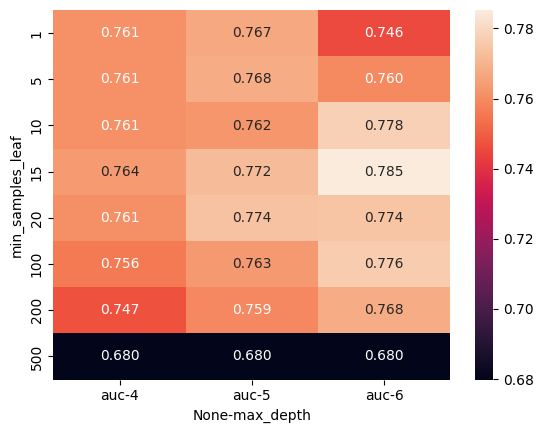

In [36]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")


In [37]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [38]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))


|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  20.00
|   |   |   |   |   |--- expenses <= 71.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- expenses >  71.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- debt <= 1600.00
|   |   |   |   |   |--- seniority <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- seniority >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- debt >  1600.00
|   |   |   |   |   |--- class: 1
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- amount <= 1330.00
|   |   |   |   |   |--- assets <= 3326.00
|   |   |   |   |   |   |--- clas

##6.6 Ensemble learning and random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [41]:
columns =['n_estimators','auc']
df_scores=pd.DataFrame(scores,columns = columns)

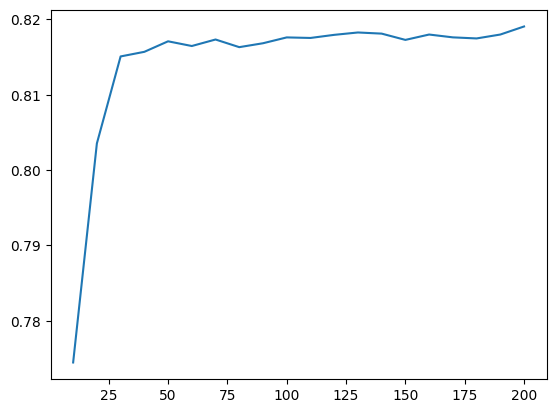

In [43]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [44]:
scores = []

for d in [5, 10, 15]:
  for n in range(10, 201, 10):
      rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
      rf.fit(X_train, y_train)

      y_pred = rf.predict_proba(X_val)[:, 1]
      auc = roc_auc_score(y_val, y_pred)

      scores.append((d, n, auc))

In [45]:
columns =['max_depth','n_estimators','auc']
df_scores=pd.DataFrame(scores,columns = columns)

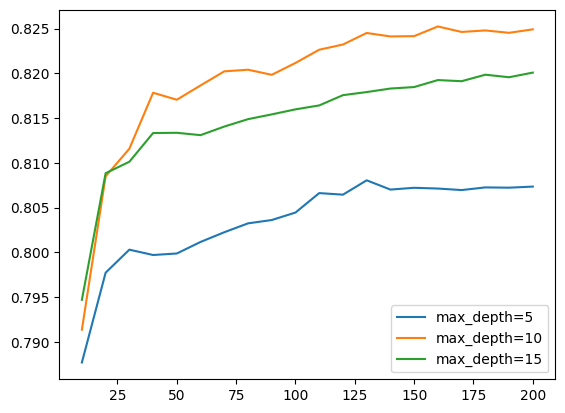

In [46]:
for d in [5, 10, 15]:
  df_subset= df_scores[df_scores.max_depth == d]
  plt.plot(df_subset.n_estimators, df_subset.auc, label= 'max_depth=%d'%d)
plt.legend()


In [47]:
max_depth=10

In [52]:
scores=[]
for s in [1, 3, 5, 10, 50]:
  for n in range(10, 201, 10):
      rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=s ,random_state=1)
      rf.fit(X_train, y_train)

      y_pred = rf.predict_proba(X_val)[:, 1]
      auc = roc_auc_score(y_val, y_pred)

      scores.append((s, n, auc))

In [53]:
columns =['min_samples_leaf','n_estimators','auc']
df_scores=pd.DataFrame(scores,columns = columns)

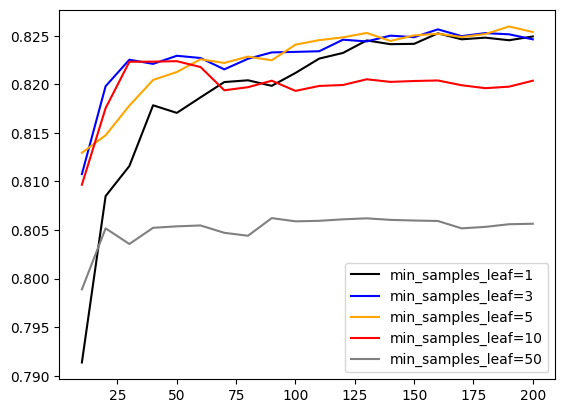

In [54]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [55]:
min_samples_leaf=3

In [56]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

##6.7 Gradient Boosting and XGBoost

In [57]:
!pip install xgboost


In [58]:
import xgboost as xgb

In [60]:
features=dv.get_feature_names_out()

In [64]:
dtrain =xgb.DMatrix(data=X_train, label=y_train, feature_names=list(features))
dval =xgb.DMatrix(data=X_val, label=y_val, feature_names=list(features))

In [65]:
xgb_params= {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'nthread':8,
    'seed':1,
    'verbosity':1
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [66]:
y_pred = model.predict(dval)

In [67]:
roc_auc_score(y_val, y_pred)

0.8072491584122448

In [68]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [69]:
%%capture output
xgb_params= {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5, evals=watchlist)

In [70]:
s = output.stdout

In [71]:
print(s[:200])

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	tr


In [73]:
def parse_xgb_output(output):
  results=[]
  for line in output.stdout.strip().split('\n'):
    it_line, train_line, val_line = line.split('\t')
    it = int(it_line.strip('[]'))
    train = float(train_line.split(':')[1])
    val = float(val_line.split(':')[1])
    results.append((it,train,val))
  columns=['num_iter','train_auc','val_auc']
  df_results=pd.DataFrame(results, columns=columns)
  return df_results

In [74]:
df_score= parse_xgb_output(output)

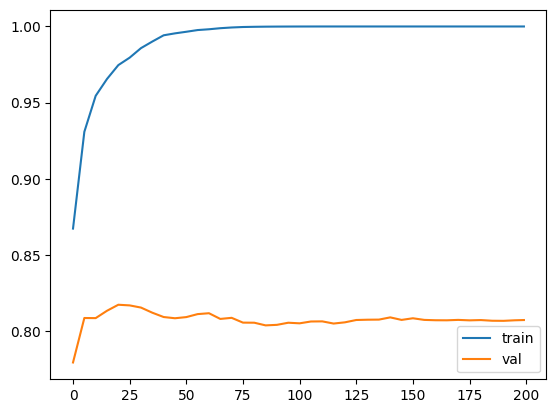

In [75]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()


##6.8 XGBoost parameter tuning

Tuning the following parameters:
*   eta
*   max_depth
*   min_child_weight

In [76]:
scores = {}


In [77]:
%%capture output
xgb_params= {
    'eta':0.1,
    'max_depth':6,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5, evals=watchlist)

In [78]:
scores = {}


In [79]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [86]:
scores = {}


In [96]:
%%capture output
xgb_params= {
    'eta':0.1,
    'max_depth':6,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5, evals=watchlist)

In [97]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [98]:
scores


{'max_depth=3':     num_iter  train_auc  val_auc
 0          0    0.77610  0.73891
 1          5    0.83067  0.77556
 2         10    0.84675  0.78896
 3         15    0.86055  0.80368
 4         20    0.86931  0.80928
 5         25    0.87558  0.81441
 6         30    0.88080  0.81808
 7         35    0.88659  0.82108
 8         40    0.89038  0.82347
 9         45    0.89403  0.82575
 10        50    0.89756  0.82583
 11        55    0.90044  0.82736
 12        60    0.90319  0.82847
 13        65    0.90565  0.82913
 14        70    0.90768  0.83005
 15        75    0.91057  0.83067
 16        80    0.91221  0.83117
 17        85    0.91472  0.83053
 18        90    0.91638  0.83029
 19        95    0.91776  0.83043
 20       100    0.91913  0.83113
 21       105    0.92070  0.83158
 22       110    0.92297  0.83170
 23       115    0.92437  0.83124
 24       120    0.92544  0.83124
 25       125    0.92711  0.83123
 26       130    0.92789  0.83169
 27       135    0.92926  0.83165

In [89]:
del scores['max_depth=10']


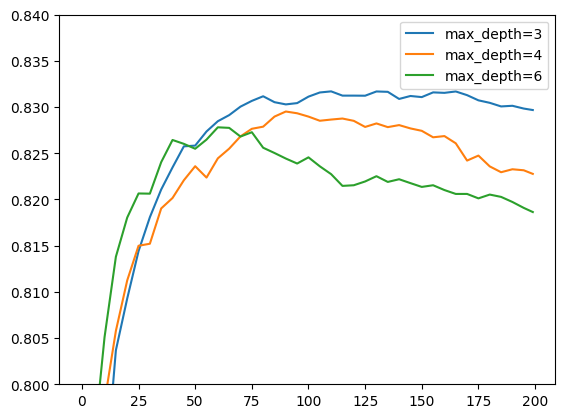

In [100]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.8, 0.84)

plt.legend()

In [101]:
scores = {}


In [106]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [107]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

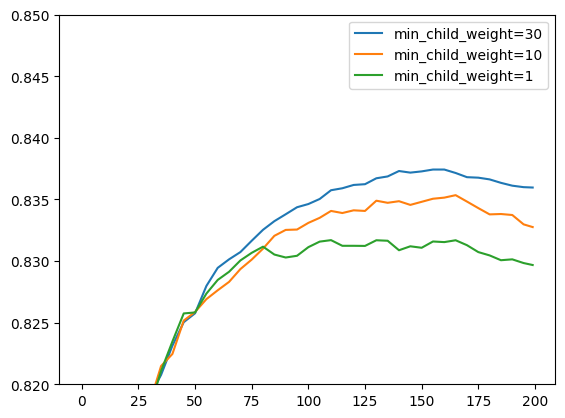

In [110]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.82, 0.85)

plt.legend()

In [112]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=125)

Other useful parameters:

* subsample and colsample_bytree
* lambda and alpha

##6.9 Selecting the final model

In [113]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7856948245380349

In [116]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [117]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.836632074786273

In [118]:
df_full_train= df_full_train.reset_index(drop=True)


In [119]:
y_full_train =(df_full_train.status=='default').astype(int).values

In [ ]:
del df_full_train['status']

In [141]:
dicts_full_train =df_full_train.to_dict(orient='records')

In [149]:
dv = DictVectorizer(sparse=False)

In [144]:
len(dv.get_feature_names_out())

29

In [150]:
X_full_train = dv.fit_transform(dicts_full_train)

In [145]:
len(X_full_train[0])

29

In [151]:
dicts_test =df_test.to_dict(orient='records')

In [152]:
X_test = dv.transform(dicts_test)

In [158]:
dfull_train = xgb.DMatrix(X_full_train, label=y_full_train, feature_names =list(dv.get_feature_names_out()))
dtest = xgb.DMatrix(X_test, label=y_test, feature_names =list(dv.get_feature_names_out()))

In [159]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfull_train, num_boost_round=125)

In [160]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8765681383352304